# 1- importing packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Loading dataset:

In [2]:
data_path = "Covid19HDDT.csv"

In [3]:
df = pd.read_csv(data_path)
df.head()

,sex,age,country,province,city,infection_case,infection_order,elementary_school_count,kindergarten_count,university_count,...,elderly_alone_ratio,nursing_home_count,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,label
0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,1,0,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
2,0,2,0,0,2,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,2.0,1.0,0
3,0,1,0,0,3,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0,1.0,0
4,1,3,0,0,4,3,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,14.0,4.0,1.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50729 entries, 0 to 50728
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       50729 non-null  int64  
 1   age                       50729 non-null  int64  
 2   country                   50729 non-null  int64  
 3   province                  50729 non-null  int64  
 4   city                      50729 non-null  int64  
 5   infection_case            50729 non-null  int64  
 6   infection_order           50729 non-null  float64
 7   elementary_school_count   50729 non-null  float64
 8   kindergarten_count        50729 non-null  float64
 9   university_count          50729 non-null  float64
 10  academy_ratio             50729 non-null  float64
 11  elderly_population_ratio  50729 non-null  float64
 12  elderly_alone_ratio       50729 non-null  float64
 13  nursing_home_count        50729 non-null  float64
 14  avg_te

In [5]:
df.nunique()

sex                          2
age                          7
country                      2
province                     2
city                        19
infection_case               7
infection_order              4
elementary_school_count      2
kindergarten_count           2
university_count             2
academy_ratio                2
elderly_population_ratio     2
elderly_alone_ratio          2
nursing_home_count           2
avg_temp                     2
min_temp                     2
max_temp                     2
precipitation                2
max_wind_speed              14
most_wind_direction         17
avg_relative_humidity        2
label                        3
dtype: int64

In [4]:
cols = list(df.columns)
for i in cols:
    print(i, list(df[i].unique()))

sex [0, 1]
age [0, 1, 2, 3, 4, 5, 6]
country [0, 1]
province [0, 1]
city [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
infection_case [0, 1, 2, 3, 4, 5, 6]
infection_order [0.0, 1.0, 2.0, 3.0]
elementary_school_count [0.0, 1.0]
kindergarten_count [0.0, 1.0]
university_count [0.0, 1.0]
academy_ratio [0.0, 1.0]
elderly_population_ratio [0.0, 1.0]
elderly_alone_ratio [0.0, 1.0]
nursing_home_count [0.0, 1.0]
avg_temp [0.0, 1.0]
min_temp [0.0, 1.0]
max_temp [0.0, 1.0]
precipitation [0.0, 1.0]
max_wind_speed [0.0, 1.0, 14.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
most_wind_direction [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]
avg_relative_humidity [0.0, 1.0]
label [0, 1, 2]


## 2.1- number of each class labels

In [5]:
class_label_counts = []
class_1_counts = df['label'].value_counts().get(1)
class_2_counts = df['label'].value_counts().get(2)
class_0_counts = df['label'].value_counts().get(0)

class_label_counts.append((class_1_counts, class_2_counts, class_0_counts))
print(class_label_counts)

[(12891, 4000, 33838)]


In [6]:
correlation_matrix = df.corr()

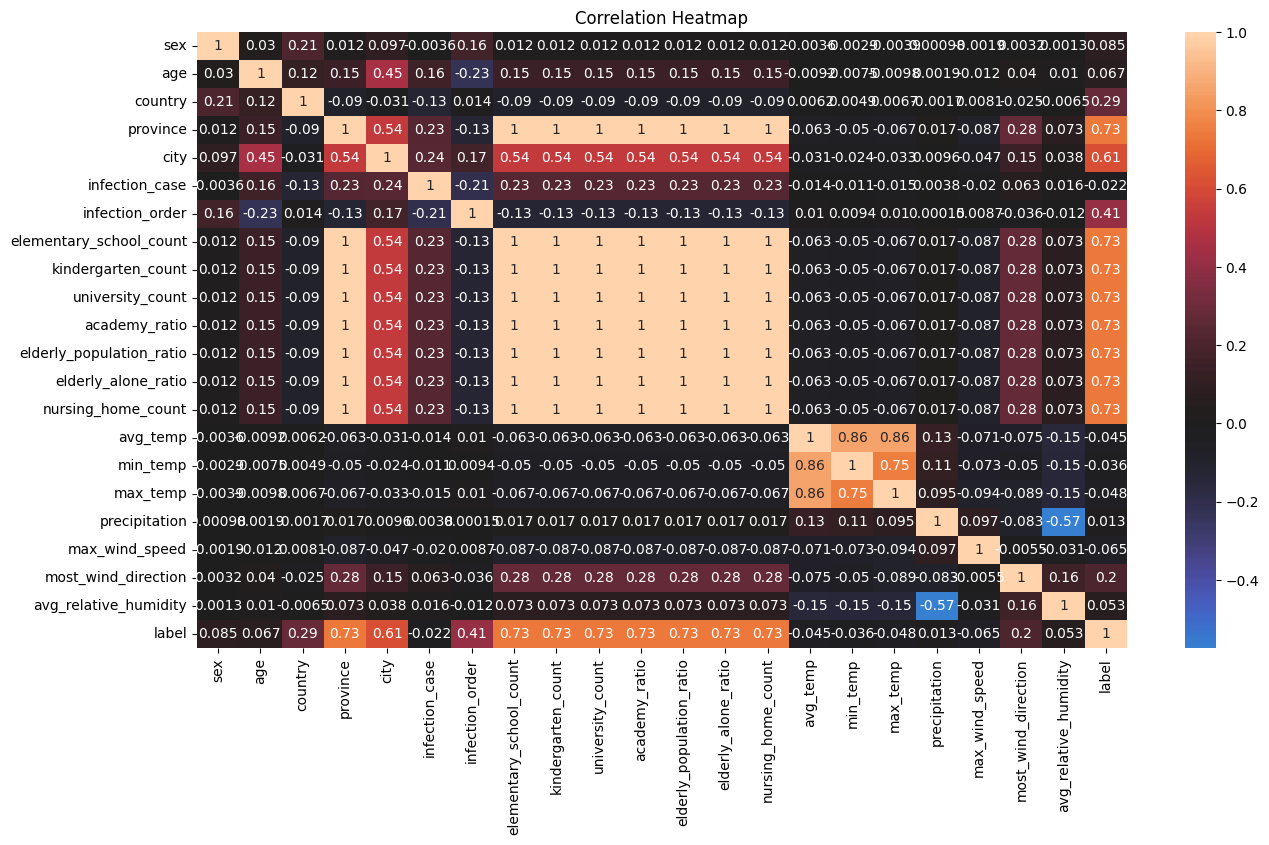

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.title('Correlation Heatmap')
plt.show()

# 3- Preprocessing:

## 3.1- Method 1 (Variance Inflation Factor):

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data


In [16]:
X = df.drop(labels='label', axis=1)

In [14]:
vif_df = calculate_vif(X)
features_to_keep = vif_df[vif_df['VIF'] < 5]['feature']

/home/samin/anaconda3/envs/py11/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [15]:
features_to_keep

0                       sex
1                       age
2                   country
5            infection_case
6           infection_order
15                 min_temp
16                 max_temp
19      most_wind_direction
20    avg_relative_humidity
Name: feature, dtype: object

In [43]:
cor_1 = df[features_to_keep].corr()

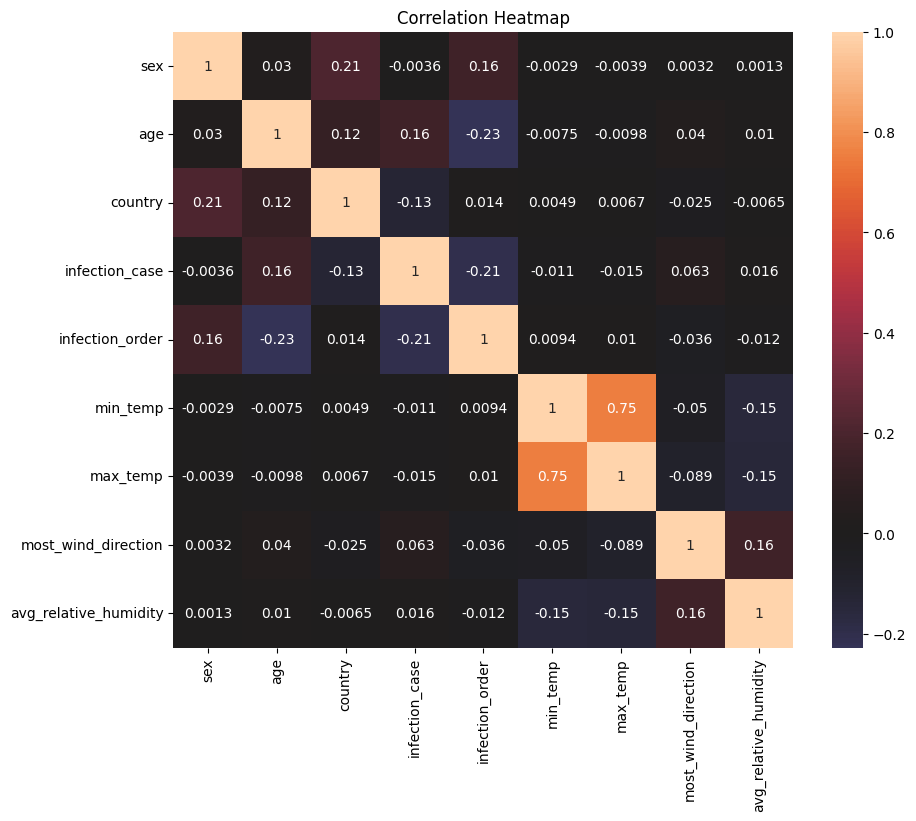

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor_1, annot=True, center=0)
plt.title('Correlation Heatmap')
plt.show()

## 3.2- Method 2 (Aggrigation):

In [19]:
cols

['sex',
 'age',
 'country',
 'province',
 'city',
 'infection_case',
 'infection_order',
 'elementary_school_count',
 'kindergarten_count',
 'university_count',
 'academy_ratio',
 'elderly_population_ratio',
 'elderly_alone_ratio',
 'nursing_home_count',
 'avg_temp',
 'min_temp',
 'max_temp',
 'precipitation',
 'max_wind_speed',
 'most_wind_direction',
 'avg_relative_humidity',
 'label']

In [21]:
df['province_city'] = (df['province'] + df['city'])/2

In [23]:
df['education'] = (df['elementary_school_count'] + df['kindergarten_count'] + df['university_count'] + df['academy_ratio'])/4

In [25]:
df['elderly'] = (df['elderly_population_ratio'] + df['elderly_alone_ratio'])/2

In [30]:
df_2 = df.drop(labels=['province', 'city', 'elementary_school_count',
                       'kindergarten_count', 'university_count', 'academy_ratio',
                       'elderly_population_ratio', 'elderly_alone_ratio',
                       'min_temp', 'max_temp'],
               axis=1)

new_order = ['sex', 'age', 'country', 'infection_case', 'infection_order',
       'nursing_home_count', 'avg_temp', 'precipitation', 'max_wind_speed',
       'most_wind_direction', 'avg_relative_humidity', 
       'province_city', 'education', 'elderly', 'label']

df_2 = df_2.reindex(columns=new_order)
df_2.head()

,sex,age,country,infection_case,infection_order,nursing_home_count,avg_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,province_city,education,elderly,label
0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,1,1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,0.0,1
2,0,2,0,1,0.0,0.0,0.0,0.0,14.0,2.0,1.0,1.0,0.0,0.0,0
3,0,1,0,2,0.0,0.0,0.0,0.0,14.0,3.0,1.0,1.5,0.0,0.0,0
4,1,3,0,3,2.0,0.0,0.0,1.0,14.0,4.0,1.0,2.0,0.0,0.0,1


In [40]:
cor_2 = df_2.corr()

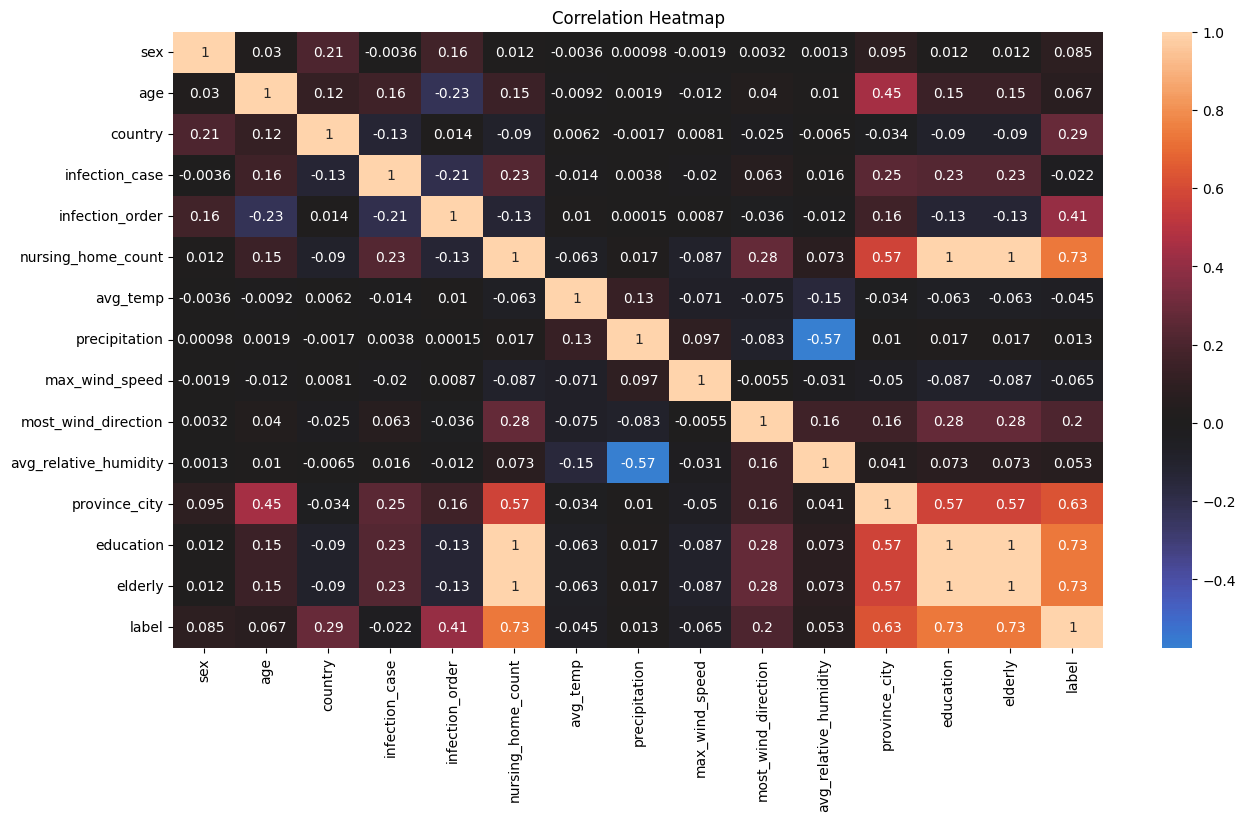

In [42]:
plt.figure(figsize=(15, 8))
sns.heatmap(cor_2, annot=True, center=0)
plt.title('Correlation Heatmap')
plt.show()

# 3- Two-class HDDT:

In [31]:
class TwoClassHDDT:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = None

    def _hellinger_distance(self, p_left, p_right):
        return np.sqrt((np.sqrt(p_left) - np.sqrt(p_right))**2 + 
                       (np.sqrt(1 - p_left) - np.sqrt(1 - p_right))**2)

    def _find_best_split(self, X, y):
        best_feature, best_threshold = None, None
        best_distance = -1

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                # Class probabilities (binary)
                p_left = np.mean(y[left_mask])
                p_right = np.mean(y[right_mask])

                distance = self._hellinger_distance(p_left, p_right)
                if distance > best_distance:
                    best_distance = distance
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return np.mean(y)  # Leaf node: probability of class 1

        feature, threshold = self._find_best_split(X, y)
        if feature is None:
            return np.mean(y)

        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return (feature, threshold, left_subtree, right_subtree)

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
        return self

    def predict_proba(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x, node=None):
        if node is None:
            node = self.tree

        if isinstance(node, (float, np.float64)):
            return node  # Probability of class 1

        feature, threshold, left, right = node
        if x[feature] <= threshold:
            return self._predict_single(x, left)
        else:
            return self._predict_single(x, right)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# 4- Find the minority class label:

In [47]:
minority_label = np.argmin(np.bincount(df['label']))
minority_label

2

In [54]:
# X = df.drop(columns='label').values
X = df[features_to_keep].values
y = df['label'].values

In [55]:
y_bin = np.where(y==minority_label, 1, 0)
y_bin

array([0, 0, 0, ..., 1, 1, 1])

# 5- Performance evaluation:

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=23)

## 5.1- Train:

In [58]:
model = TwoClassHDDT(max_depth=10).fit(X_train, y_train)

In [59]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC-ROC: 1.0


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14027
           1       1.00      1.00      1.00      1192

    accuracy                           1.00     15219
   macro avg       1.00      1.00      1.00     15219
weighted avg       1.00      1.00      1.00     15219



In [24]:
np.bincount(y_test)

array([14027,  1192])

In [26]:
np.bincount(y_train)

array([32702,  2808])

# 6- OVO (One Versus One) and OVA (One Versus All):

### 6.1- One vs One

In [60]:
from itertools import combinations

class OVO_HDDT:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls1, cls2 in combinations(self.classes, 2):
            mask = np.isin(y, [cls1, cls2])
            X_pair = X[mask]
            y_pair = np.where(y[mask] == cls1, 1, 0)
            model = TwoClassHDDT(max_depth=self.max_depth).fit(X_pair, y_pair)
            self.models.append((cls1, cls2, model))
        return self

    def predict(self, X):
        votes = np.zeros((X.shape[0], len(self.classes)))
        for cls1, cls2, model in self.models:
            preds = model.predict(X)
            for i, pred in enumerate(preds):
                votes[i, cls1 if pred == 1 else cls2] += 1
        return np.argmax(votes, axis=1)

### 6.2- One vs Al:

In [61]:
class OVA_HDDT:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.models = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = np.where(y == cls, 1, 0)
            model = TwoClassHDDT(max_depth=self.max_depth).fit(X, y_binary)
            self.models[cls] = model
        return self

    def predict_proba(self, X):
        probas = np.zeros((X.shape[0], len(self.classes)))
        for i, cls in enumerate(self.classes):
            probas[:, i] = self.models[cls].predict_proba(X)
        return probas

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

### 6.3- Evaluate Performance:

In [63]:
# Load original dataset (3 classes)
X = df[features_to_keep].values
y = df["label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# OVA
ova_model = OVA_HDDT(max_depth=5).fit(X_train, y_train)
y_pred_ova = ova_model.predict(X_test)
print("OVA Accuracy:", accuracy_score(y_test, y_pred_ova))

# OVO
ovo_model = OVO_HDDT(max_depth=5).fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
print("OVO Accuracy:", accuracy_score(y_test, y_pred_ovo))

OVA Accuracy: 0.9824561403508771
OVO Accuracy: 0.9824561403508771
